<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
Hour                                     140 non-null object
Immobilized_bus                          140 non-null float64
Broken_Truck                             140 non-null float64
Vehicle_excess                           140 non-null object
Accident_victim                          138 non-null float64
Running_over                             139 non-null object
Fire_vehicles                            140 non-null object
Occurrence_involving_freight             140 non-null float64
Incident_involving_dangerous_freight     138 non-null float64
Lack_of_electricity                      140 non-null float64
Fire                                     140 non-null float64
Point_of_flooding                        140 non-null float64
Manifestations                           139 non-null float64
Defect_in_the_network_of_trolleybuses    138 non-null float64
Tree_on_the_road               

KeyError: "None of [Index(['Vehicle_excess_clean'], dtype='object')] are in the [columns]"

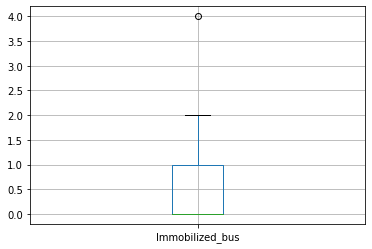

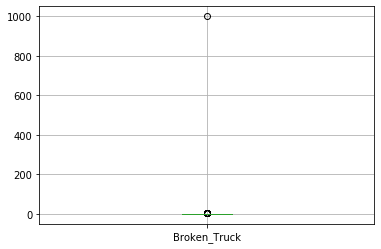

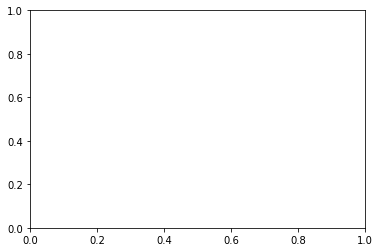

In [2]:
from scipy.io import arff
import pandas as pd
import sys, getopt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
# Step 1 -  . Convert to csv and load data 

def arff2csv(arff_path, csv_path=None, _encoding='utf8'):
    with open(arff_path, 'r', encoding=_encoding) as fr:
        attributes = []
        if csv_path is None:
            csv_path = arff_path[:-4] + 'csv'  # *.arff -> *.csv
        write_sw = False
        with open(csv_path, 'w', encoding=_encoding) as fw:
            for line in fr.readlines():
                if write_sw:
                    fw.write(line)
                elif '@data' in line:
                    fw.write(','.join(attributes) + '\n')
                    write_sw = True
                elif '@attribute' in line:
                    attributes.append(line.split()[1])  # @attribute attribute_tag numeric
    print("Convert {} to {}.".format(arff_path, csv_path))

#arff2csv('data - original.arff', 'data - original.csv')


#data = arff.loadarff('data - original.arff')
#df = pd.DataFrame(data[0])
pd.set_option('display.max_columns', None)
missing_values = ["n/a", "na", "-1", " "]
df = pd.read_csv('data - original.csv', na_values = missing_values);


# Step 1.1 data transformation
#Replace T /TRUE  with 1 , F.FALSE with 0

#df = df.replace(to_replace = 'T', value = 1)
#df = df.replace(to_replace = 'F', value = 0)

print(df.info())

df['Fire_vehicles'] = df['Fire_vehicles'].replace({'YES': 1, 'NO': 0});
df['Vehicle_excess'] = df['Vehicle_excess'].replace({'T': 1, 'F': 0,'t': 1, 'f': 0 })

#df.Vehicle_excess.replace({'T': mapping, 'F': mapping, 'f': mapping, 't': mapping}, inplace=True)
#print (df.Vehicle_excess.describe())
#df.Vehicle_excess[df.Vehicle_excess == 'T'] = 1 
#df.Vehicle_excess[df.Vehicle_excess == 't'] = 1
#df.Vehicle_excess[df.Vehicle_excess == 'F'] = 0
#df.Vehicle_excess[df.Vehicle_excess == 'f'] = 0
print (df.Vehicle_excess.describe())
# Step 2 -  Finding Missing values 
#print(df.describe())
print('no of records - ', df.shape)
print(df.head())
print(df.isnull().sum())
#df.isnull().mean()

#Step 3  - visualize distrubution for columsn which have missing data  
#sns.set(color_codes=True)
#plt.figure() 
#sns.distplot(df.Accident_victim.notnull());
#plt.figure() 
#sns.distplot(df.Incident_involving_dangerous_freight.notnull());
#plt.figure()
#sns.distplot(df.Manifestations.notnull());
#plt.figure()
#sns.distplot(df.Defect_in_the_network_of_trolleybuses.notnull());
#plt.figure()
#sns.distplot(df.Semaphore_off.notnull());
#plt.figure()
#Step 4   - Impute missing values


#Step 5 check outliers

boxplot = df.boxplot(column=['Immobilized_bus'])
plt.figure()
boxplot = df.boxplot(column=['Broken_Truck'])
plt.figure()
boxplot = df.boxplot(column=['Vehicle_excess_clean'])
plt.figure()
oxplot = df.boxplot(column=['Accident_victim'])
plt.figure()
boxplot = df.boxplot(column=['Running_over'])
plt.figure()
boxplot = df.boxplot(column=['Fire_vehicles'])
plt.figure()
boxplot = df.boxplot(column=['Occurrence_involving_freight'])
plt.figure()
boxplot = df.boxplot(column=['Incident_involving_dangerous_freight'])
plt.figure()
boxplot = df.boxplot(column=['Lack_of_electricity'])
plt.figure()
boxplot = df.boxplot(column=['Fire'])
plt.figure()
boxplot = df.boxplot(column=['Point_of_flooding'])
plt.figure()
boxplot = df.boxplot(column=['Manifestations'])
plt.figure()
boxplot = df.boxplot(column=['Defect_in_the_network_of_trolleybuses'])
plt.figure()
boxplot = df.boxplot(column=['Tree_on_the_road'])
plt.figure()
boxplot = df.boxplot(column=['Semaphore_off'])
plt.figure()
boxplot = df.boxplot(column=['Intermittent_Semaphore'])
plt.figure()
